# Sentiment Analysis on Movie Reviews using KNN Classifier

In [2]:
#Importing all the neccessary libraries
%matplotlib inline 
#allows for inline plotting with Matplotlib
import pandas as pd 
#library that provides data structures like DataFrames for handling tabular data
import numpy as np 
# library for numerical computing in Python
import nltk 
#The Natural Language Toolkit, a suite of libraries and programs for natural language processing (NLP)
import string 
#Python module for string operations
import matplotlib.pyplot as plt 
#plotting library used for creating interactive visualizations in Python
import seaborn as sns
#library based on Matplotlib that provides a high-level interface for drawing
from sklearn.feature_extraction.text import TfidfTransformer 
#transforms a count matrix to a normalized term-frequency or 
#term-frequency times inverse document-frequency (TF-IDF) representation
from sklearn.feature_extraction.text import TfidfVectorizer 
#that converts a collection of raw documents to a matrix of TF-IDF features
from sklearn.feature_extraction.text import CountVectorizer 
#hat converts a collection of text documents to a matrix of token counts
from sklearn.metrics import confusion_matrix 
#function that computes the confusion matrix to evaluate the accuracy of a classification
from sklearn import metrics 
#functions for calculating various performance metrics
from sklearn.metrics import roc_curve, auc
#Functions to compute the Receiver Operating Characteristic (ROC) curve
#and the area under the curve (AUC) for binary classifiers
from nltk.stem.porter import PorterStemmer 
#class for stemming words using the Porter stemming algorithm,
#which removes common morphological and inflexional endings from words
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer 
#class for lemmatizing words using the WordNet database, reducing words to their base or root form
from gensim.models import Word2Vec 
#class in Gensim for training and using Word2Vec models, which produce word embeddings
from gensim.models import KeyedVectors 
#class in Gensim for loading and working with pre-trained word vectors.
import pickle 
#module for serializing and de-serializing Python objects
import warnings 
#module for issuing warning messages
warnings.filterwarnings("ignore")
from sklearn import datasets, neighbors
from sklearn.model_selection import train_test_split 
#function for splitting arrays or matrices into random train and test subsets
from sklearn.neighbors import KNeighborsClassifier 
#class implementing the k-nearest neighbors (k-NN) classification algorithm
from sklearn.metrics import accuracy_score 
#function for calculating the accuracy classification score
from sklearn.model_selection import cross_val_score 
#function for evaluating a score by cross-validation
from collections import Counter 
#class from the collections module that provides a dictionary subclass for counting hashable objects
from sklearn.model_selection import cross_validate 
#function for evaluating multiple metrics by cross-validation
#from sklearn import cross_validation
from matplotlib.colors import ListedColormap 
#class for creating colormaps from a list of colors
from sklearn.metrics import precision_score 
#Functions for calculating precision
from sklearn.metrics import recall_score 
#Functions for calculating recall
from sklearn.metrics import f1_score 
#Functions for calculating F1-score metrics
import scikitplot.metrics as sciplot 
# library for visualizing metrics in machine learning models
import sklearn.metrics as metrics
import math
from sklearn.decomposition import TruncatedSVD 
#class for dimensionality reduction using truncated singular value decomposition (SVD)

<b> Data Source: <b> https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews

### References :
1. Chandra, Y., & Jana, A. (2020). Sentiment Analysis using Machine Learning and Deep Learning. 2020 7th International Conference on Computing for Sustainable Global Development (INDIACom). doi:10.23919/indiacom49435.2020.9083703 

2. Rathee, N., Joshi, N., & Kaur, J. (2018). Sentiment Analysis Using Machine Learning Techniques on Python. 2018 Second International Conference on Intelligent Computing and Control Systems (ICICCS). doi:10.1109/iccons.2018.8663224 

3. Nigam, S., Das, A. K., & Chandra, R. (2018). Machine Learning Based Approach To Sentiment Analysis. 2018 International Conference on Advances in Computing, Communication Control and Networking (ICACCCN). doi:10.1109/icacccn.2018.8748848 

### Attribute Information: 

1. Phrase Id
2. Sentence Id
3. Phrase
4. Sentiment

#### Objective: 

Our main objective for this analysis is to train a model which can seperate the postive and negative reviews.

#### While pre-processing the original dataset we have taken into consideration the following points.

1. We will classify a review to be positive if and only if the corresponding Score for the given review is 3 or 4.
2. We will classify a review to be negative if and only if the corresponding Score for the given review is 0 or 1.
3. We will ignore the reviews for the time being which has a Score rating of 2. Because 2 can be thought of as a neutral review. It's neither negative nor positive.
4. We will remove the duplicate entries from the dataset.
5. We will train our final model using four featurizations -> bag of words model, tf-idf model, average word-to-vec model and tf-idf weighted word-to-vec model.
6. So at end of the training the model will be trained on the above four featurizations to determine if a given review is positive or negative.

## Key Terms

Certainly! Based on the provided code snippets and discussions, here are some keywords and key terms along with their explanations:

1. Bag-of-Words (BoW):
   - Definition: A method for converting text into numerical feature vectors where each unique word in the text is represented by a dimension in the vector space. It counts the occurrence of each word in the document.
   - Usage: Used for feature extraction in natural language processing and machine learning tasks.

2. TF-IDF (Term Frequency-Inverse Document Frequency):
   - Definition: A numerical statistic that reflects the importance of a word in a document relative to a collection of documents. It balances the frequency of a word in a document with its frequency across all documents.
   - Usage: Commonly used in information retrieval and text mining as a way to weigh the importance of words in a document corpus.

3. Word2Vec:
   - Definition: A technique for learning word embeddings, which are dense vector representations of words in a continuous vector space, typically used to capture semantic relationships between words.
   - Usage: Often employed in natural language processing tasks such as word similarity, language modeling, and sentiment analysis.

4. K-Nearest Neighbors (KNN):
   - Definition: A non-parametric algorithm used for classification and regression. It predicts the classification of a data point based on majority class among its nearest neighbors in the feature space.
   - Usage: Applied in various machine learning tasks where classification or regression based on similarity in feature space is required.

5. Cross-Validation:
   - Definition: A technique used to assess how well a model generalizes to an independent dataset. It partitions the dataset into multiple subsets (folds), trains the model on some folds, and evaluates it on the remaining fold.
   - Usage: Helps in tuning model hyperparameters, selecting models, and estimating model performance.

6. Standardization:
   - Definition: A preprocessing step that transforms data to have zero mean and unit variance. It ensures that features are on a similar scale, preventing some features from dominating others in the learning process.
   - Usage: Often applied to features before feeding them into machine learning algorithms that assume data is normally distributed.

7. Sparse Matrix:
   - Definition: A matrix where most of the elements are zero. It is efficient in memory usage and computation for datasets with a large number of features that are mostly zeros.
   - Usage: Commonly used to represent high-dimensional data in natural language processing tasks like text classification using BoW or TF-IDF.

8. Precision, Recall, F1-Score:
   - Precision: Measures the accuracy of positive predictions. It is the ratio of true positive predictions to the total predicted positives.
   - Recall: Measures the ratio of true positive predictions to the total actual positives. It quantifies the ability of the model to find all relevant instances in the dataset.
   - F1-Score: A harmonic mean of precision and recall, providing a single metric to evaluate a model's performance, balancing both precision and recall.
   
Certainly! Here are some additional terms and their explanations related to text preprocessing and machine learning:

9. Stop Words:
   - Definition: Commonly used words (such as "and", "the", "is") that are filtered out before or after processing text data. These words are often considered to have little value in determining the meaning of a text.
   - Usage: Stop words are removed during text preprocessing to improve the efficiency of algorithms and to focus on meaningful words.

10. Decontracted Text:
   - Definition: The process of expanding contractions (e.g., "can't" to "cannot", "I'll" to "I will") in text data.
   - Usage: Helps in standardizing text and improving the accuracy of text processing tasks by treating words in their expanded form.

11. Tokenization:
   - Definition: The process of breaking down a text into smaller units such as words or sentences (tokens).
   - Usage: Essential for various text processing tasks including indexing, stemming, and semantic analysis.

12. Stemming:
   - Definition: The process of reducing inflected (or sometimes derived) words to their word stem or root form.
   - Usage: Reduces the number of words to be processed, which can improve the efficiency of text analysis and retrieval.

13. Lemmatization:
   - Definition: Similar to stemming, but it reduces words to their base or dictionary form (lemma) based on their part of speech.
   - Usage: Provides more accurate results compared to stemming, especially in applications where word meaning and context are important.

14. HTML Tags:
   - Definition: Tags used in HTML markup language to structure and format content on web pages.
   - Usage: Removed during text preprocessing to clean raw text data extracted from web sources before further analysis.

15. Punctuation:
   - Definition: Characters such as commas, periods, exclamation marks, etc., used to separate sentences or clauses.
   - Usage: Often removed or replaced during text preprocessing to simplify text and improve the accuracy of text-based models.

16. Feature Extraction:
   - Definition: The process of transforming raw data into numerical features that can be used as input to machine learning algorithms.
   - Usage: In text processing, techniques like BoW, TF-IDF, and word embeddings (e.g., Word2Vec) are used to extract features from text data for classification or clustering tasks.

These terms and concepts are fundamental in natural language processing (NLP) and machine learning (ML) tasks, especially when dealing with text data preprocessing, feature extraction, and model evaluation.

## Reading Raw Data 

In [3]:
data = pd.read_csv('train.tsv', delimiter='\t')
# data= data[1:1000]
print("shape",np.shape(data))
data.head(5)

shape (156060, 4)


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
final_data=data
final_data['SentimentPolarity'] = final_data['Sentiment'].apply(lambda x : 'Positive' if x > 2 else 'Negative')
final_data['Class_Labels'] = final_data['SentimentPolarity'].apply(lambda x : 1 if x == 'Positive' else 0)
final_data.head()

,PhraseId,SentenceId,Phrase,Sentiment,SentimentPolarity,Class_Labels
0,1,1,A series of escapades demonstrating the adage ...,1,Negative,0
1,2,1,A series of escapades demonstrating the adage ...,2,Negative,0
2,3,1,A series,2,Negative,0
3,4,1,A,2,Negative,0
4,5,1,series,2,Negative,0


This code creates a new DataFrame `final_data` by copying the existing `data` DataFrame. It then adds two new columns to `final_data`. The first column, `SentimentPolarity`, is created by applying a lambda function to the `Sentiment` column. If the sentiment value is greater than 2, the polarity is labeled as 'Positive'; otherwise, it is labeled as 'Negative'. The second column, `Class_Labels`, is derived from the `SentimentPolarity` column, where 'Positive' is converted to 1 and 'Negative' to 0. This transformation prepares the data for further analysis or modeling by converting sentiment scores into binary class labels.

<Axes: title={'center': 'Distribution Of Positive and Negative reviews'}>

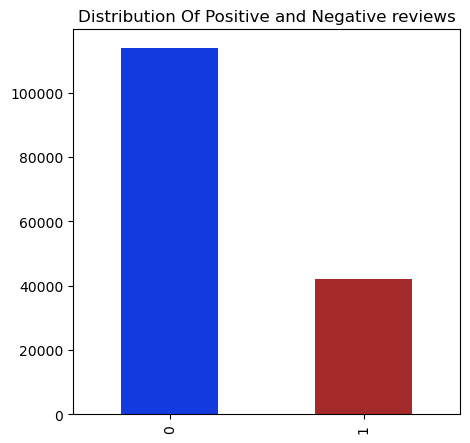

In [26]:
#Display distribution of Postive and Negative reviews in a bar graph
final_data["Class_Labels"].value_counts().plot(kind='bar',color=['#123adc','brown'],title='Distribution Of Positive and Negative reviews',figsize=(5,5))

## Preprocessing 

### Preprocessing Review 

Our data requires some preprocessing before we go on further with analysis and making the prediction model.

Hence in the Preprocessing phase we do the following in the order below:-

1. Begin by removing the html tags
2. Remove any punctuations or limited set of special characters like , or . or # etc.
3. Check if the word is made up of english letters and is not alpha-numeric
4. Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)
5. Convert the word to lowercase
6. Remove Stopwords
7. Finally Snowball Stemming the word (it was obsereved to be better than Porter Stemming)

After which we collect the words used to describe positive and negative reviews

In [6]:
#Printing some random reviews.
sent_1 = final_data['Phrase'].values[0]
print(sent_1)
print("Review Polarity: {}".format(final_data['SentimentPolarity'].values[0]))
print("="*215)

sent_2 = final_data['Phrase'].values[1000]
print(sent_2)
print("Review Polarity: {}".format(final_data['SentimentPolarity'].values[1000]))
print("="*215)

sent_3 = final_data['Phrase'].values[1500]
print(sent_3)
print("Review Polarity: {}".format(final_data['SentimentPolarity'].values[1500]))
print("="*215)

sent_4 = final_data['Phrase'].values[4900]
print(sent_4)
print("Review Polarity: {}".format(final_data['SentimentPolarity'].values[4900]))
print("="*215)

sent_5 = final_data['Phrase'].values[12566]
print(sent_5)
print("Review Polarity: {}".format(final_data['SentimentPolarity'].values[12566]))
print("="*215)


A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .
Review Polarity: Negative
to avoid
Review Polarity: Negative
convolutions
Review Polarity: Negative
pointless extremes
Review Polarity: Negative
Dignified CEO 's meet at a rustic retreat and pee against a tree .
Review Polarity: Negative


This code prints five phrases from the final_data DataFrame along with their corresponding sentiment polarity labels. For each selected phrase (at indices 0, 1000, 1500, 4900, and 12566), it displays the phrase text followed by the sentiment polarity (either 'Positive' or 'Negative'), separated by a line of equal signs for clarity. This helps in visualizing the sentiment classification of different phrases within the dataset.

In [7]:
import re

# Remove URLs from the first phrase
sent_1 = re.sub(r"http\S+", " ", sent_1)

# Remove URLs from the phrase at index 1000
sent_2 = re.sub(r"http\S+", " ", sent_2)

# Remove URLs from the phrase at index 1500
sent_3 = re.sub(r"http\S+", " ", sent_3)

# Remove URLs from the phrase at index 4900
sent_4 = re.sub(r"http\S+", " ", sent_4)

# Remove URLs from the phrase at index 12566
sent_5 = re.sub(r"http\S+", " ", sent_5)

# Print the first phrase after removing URLs
print(sent_1, "\n")
print("=" * 215)

# Print the phrase at index 1000 after removing URLs
print(sent_2, "\n")
print("=" * 215)

# Print the phrase at index 1500 after removing URLs
print(sent_3, "\n")
print("=" * 215)

# Print the phrase at index 4900 after removing URLs
print(sent_4, "\n")
print("=" * 215)

# Print the phrase at index 12566 after removing URLs
print(sent_5, "\n")
print("=" * 215)


A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story . 

to avoid 

convolutions 

pointless extremes 

Dignified CEO 's meet at a rustic retreat and pee against a tree . 



In [8]:
# Function to clean HTML tags from a sentence
def removeHtml(sentence): 
    # Compile a regex pattern to match HTML tags
    pattern = re.compile('<.*?>')
    # Replace HTML tags with a space in the sentence
    cleaned_text = re.sub(pattern, ' ', sentence)
    # Return the cleaned text
    return cleaned_text

# Print the first sentence after removing HTML tags
print(removeHtml(sent_1) + "\n")

# Print the sentence at index 1000 after removing HTML tags
print(removeHtml(sent_2) + "\n")

# Print the sentence at index 1500 after removing HTML tags
print(removeHtml(sent_3) + "\n")

# Print the sentence at index 4900 after removing HTML tags
print(removeHtml(sent_4) + "\n")

# Print the sentence at index 12566 after removing HTML tags
print(removeHtml(sent_5) + "\n")


A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .

to avoid

convolutions

pointless extremes

Dignified CEO 's meet at a rustic retreat and pee against a tree .



In [9]:
import re

# Function to expand contractions and standardize certain phrases
def decontracted(x):
    # Convert input to string and lower case
    x = str(x).lower()

    # Replace specific patterns with expanded forms
    x = x.replace(",000,000", " m").replace(",000", " k")  # Convert large numbers
    x = x.replace("′", "'").replace("’", "'")  # Standardize apostrophes

    # Replace common contractions with their expanded forms
    x = x.replace("won't", " will not").replace("cannot", " can not").replace("can't", " can not")
    x = x.replace("n't", " not").replace("what's", " what is").replace("it's", " it is")
    x = x.replace("'ve", " have").replace("'m", " am").replace("'re", " are")
    x = x.replace("he's", " he is").replace("she's", " she is").replace("'s", " own")

    # Replace symbols with their word equivalents
    x = x.replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")
    x = x.replace("€", " euro ").replace("'ll", " will")

    # Replace additional contractions and slang
    x = x.replace("how's"," how has").replace("y'all"," you all")
    x = x.replace("o'clock"," of the clock").replace("ne'er"," never").replace("let's"," let us")
    x = x.replace("finna"," fixing to").replace("gonna"," going to").replace("gimme"," give me").replace("gotta"," got to").replace("'d"," would")
    x = x.replace("daresn't"," dare not").replace("dasn't"," dare not").replace("e'er"," ever").replace("everyone's"," everyone is")
    x = x.replace("'cause'"," because")

    # Use regex to replace numeric patterns with shorthand forms
    x = re.sub(r"([0-9]+)000000", r"\1m", x)  # Convert millions
    x = re.sub(r"([0-9]+)000", r"\1k", x)  # Convert thousands

    return x


In [10]:
import re

# Example string
'''
>>> import re
>>> s = "ABCD abcd AB55 55CD A55D 5555"
>>> re.sub("\S*\d\S*", "", s).strip()

'ABCD abcd'
>>>'''

# Remove words containing numbers from the sentence
sent_1 = re.sub("\S*\d\S*", " ", sent_1).strip()

# Print the cleaned sentence
print(sent_1)


A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .


In [11]:
'''Data Cleaning Stage.'''
# Data Cleaning Stage. Clean each review from the sampled Amazon Dataset

# Remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
def removeNumbers(sentence):
    """
    Removes words that contain numbers from the sentence.
    """
    sentence = re.sub("\S*\d\S*", " ", sentence).strip()
    return sentence

# Function to clean html tags from a sentence
def removeHtml(sentence):
    """
    Removes HTML tags from the sentence.
    """
    pattern = re.compile('<.*?>')
    cleaned_text = re.sub(pattern, ' ', sentence)
    return cleaned_text

# Remove URL from sentences.
def removeURL(sentence):
    """
    Removes URLs from the sentence.
    """
    text = re.sub(r"http\S+", " ", sentence)
    sentence = re.sub(r"www.\S+", " ", text)
    return sentence

# Function to keep only words containing letters A-Z and a-z.
# This will remove all punctuations, special characters, etc. https://stackoverflow.com/a/5843547/4084039
def removePunctuations(sentence):
    """
    Removes all characters except letters from A-Z and a-z.
    """
    cleaned_text = re.sub('[^a-zA-Z]', ' ', sentence)
    return cleaned_text

# Remove words like 'zzzzzzzzzzzzzzzzzzzzzzz', 'testtting', 'grrrrrrreeeettttt' etc.
# Preserves words like 'looks', 'goods', 'soon' etc.
# We will remove all such words which have three consecutive repeating characters.
def removePatterns(sentence):
    """
    Removes words with three consecutive repeating characters.
    """
    cleaned_text = re.sub(r"\s*\b(?=\w*(\w)\1{2,})\w*\b", ' ', sentence)
    return cleaned_text


In [12]:
# Importing necessary modules for stemming and stopwords removal
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

# Initialize the Snowball stemmer for the English language
sno = SnowballStemmer(language='english')

# Get the default list of stopwords from NLTK
default_stopwords = set(stopwords.words('english'))

# Define a set of stopwords to be removed from the default stopwords list
remove_not = set(['no', 'nor', 'not'])

# Create a custom list of stopwords by removing 'no', 'nor', 'not' from the default list
custom_stopwords = default_stopwords - remove_not


100%|███████████████████████████████████████████████████████████████████████| 10221/10221 [00:00<00:00, 2039873.49it/s]


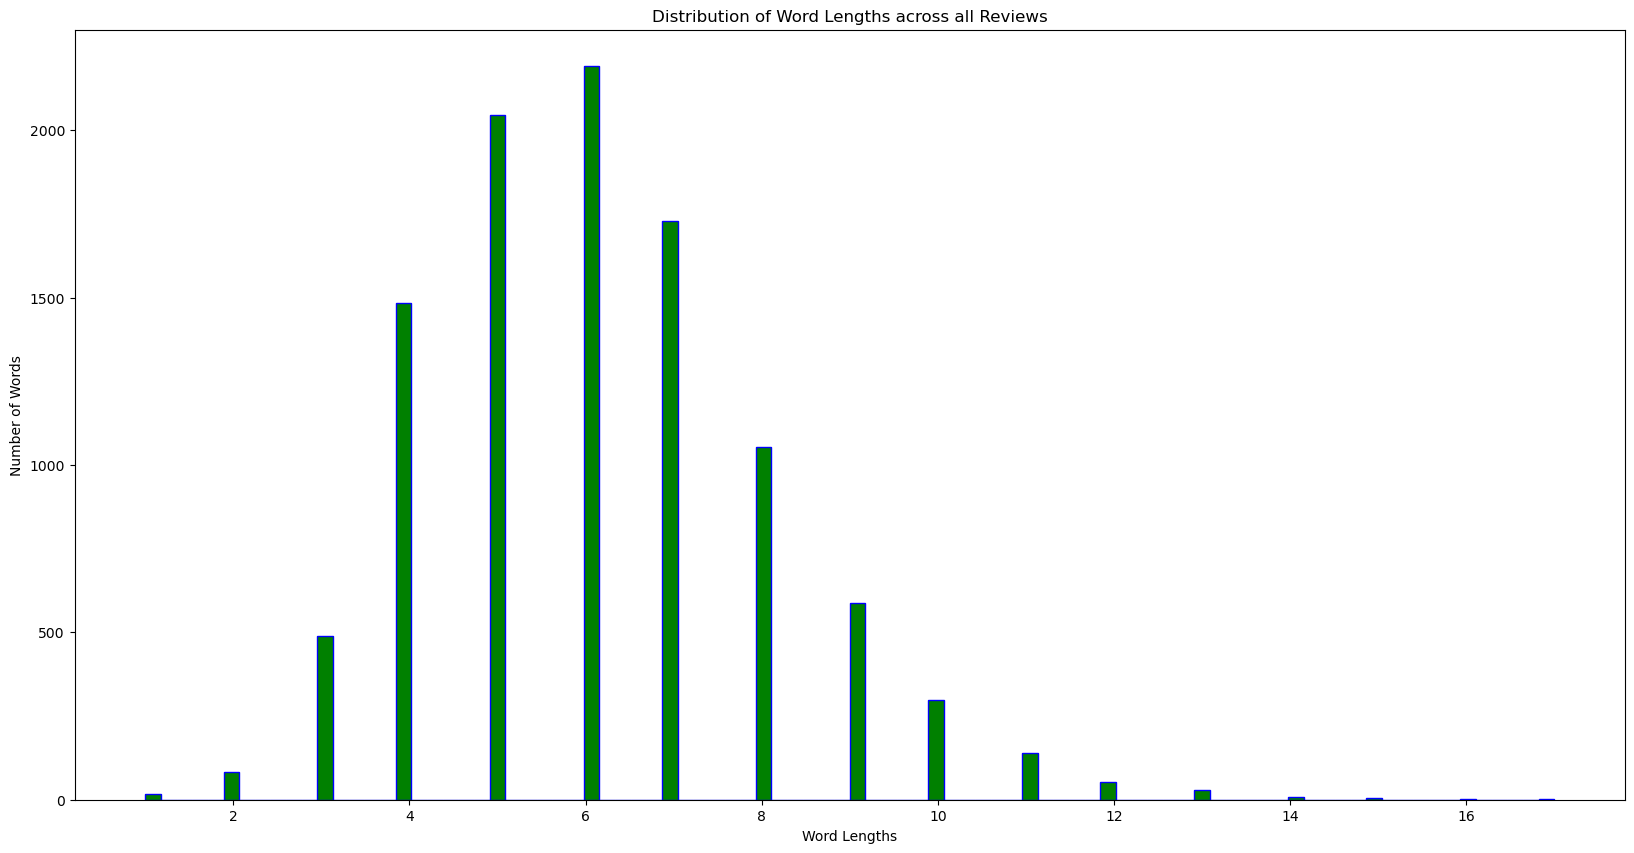

In [22]:
# Import necessary libraries
from tqdm import tqdm
import matplotlib.pyplot as plt

# Initialize an empty list to store all words
total_words = []

# Iterate over each review in the dataset
for review in tqdm(final_data['Phrase'].values):
    # Apply preprocessing steps to clean the review text
    review = decontracted(review)
    review = removeNumbers(review)
    review = removeHtml(review)
    review = removeURL(review)
    review = removePunctuations(review)
    review = removePatterns(review)
    
    # Split the cleaned review into words
    for cleaned_word in review.split():
        # Check if the word is not in custom_stopwords
        if cleaned_word not in custom_stopwords:
            # Stem the word and convert it to lowercase
            stemmed_word = sno.stem(cleaned_word.lower())
            # Add the stemmed word to the list of total_words
            total_words.append(stemmed_word)

# Get a list of unique words
total_words = list(set(total_words))

# Initialize an empty list to store the lengths of each word
dist = []

# Calculate the length of each word and append it to dist
for word in tqdm(total_words):
    length = len(word)
    dist.append(length)

# Create a histogram to visualize the distribution of word lengths
plt.figure(figsize=(20, 10))
plt.hist(dist, color='green', edgecolor='blue', bins=90)
plt.title('Distribution of Word Lengths across all Reviews')
plt.xlabel('Word Lengths')
plt.ylabel('Number of Words')
plt.show()


### Conclusion from the above histogram: 

We can see that most stemmed words present in the reviews has lengths between 3 and 10. Words which has length greater than 13 are very very very few as compared to other words. So we will discard these words from the reviews when we process them. It means we will consider only those words whose length is greater than 2 and less than 13.

In [14]:
# Combining all the above data cleaning methodologies as discussed above.

#Processing review Texts
preprocessed_reviews = [] # Store all the processed reviews
all_positive_words = [] # Store all the relevant words from Positive reviews
all_negative_words = [] # Store all the relevant words from Negative reviews

count = 0 # Iterator to iterate through the list of reviews and check if a given review belongs to the positive or negative class
string = ''
stemed_word = ''

# Iterate through each review in final_data['Phrase'].values
for review in tqdm(final_data['Phrase'].values):
    filtered_sentence = []
    
    # Apply various data cleaning steps to each review
    review = decontracted(review)  # Decontract words like "won't" to "will not"
    review = removeNumbers(review)  # Remove numbers from the review
    review = removeHtml(review)  # Remove HTML tags from the review
    review = removeURL(review)  # Remove URLs from the review
    review = removePunctuations(review)  # Remove punctuations from the review
    review = removePatterns(review)  # Remove patterns like repeated characters from the review
    
    # Process each cleaned word in the review
    for cleaned_words in review.split():   
        if (cleaned_words not in custom_stopwords) and (2 < len(cleaned_words) < 16):
            stemed_word = sno.stem(cleaned_words.lower())  # Stem each word using SnowballStemmer
            filtered_sentence.append(stemed_word)  # Append stemmed word to filtered_sentence
            
            # Append positive and negative words based on SentimentPolarity
            if final_data['SentimentPolarity'].values[count] == 'Positive': 
                all_positive_words.append(stemed_word)
            if final_data['SentimentPolarity'].values[count] == 'Negative':
                all_negative_words.append(stemed_word)
    
    # Join filtered words into a final string of cleaned words for the review
    review = " ".join(filtered_sentence)
    preprocessed_reviews.append(review.strip())  # Append cleaned review to preprocessed_reviews
    count += 1

# Save the list of positive words and negative words using pickle
import pickle
with open('all_positive_words.pkl', 'wb') as file:
    pickle.dump(all_positive_words, file)
    
with open('all_negative_words.pkl', 'wb') as file:
    pickle.dump(all_negative_words, file)
    
# Adding a column of CleanedText to the table final which stores the data corpus after pre-processing the reviews 
final_data['CleanedText'] = preprocessed_reviews
    
# Print the length of the data corpus
print("The length of the data corpus is : {}".format(len(preprocessed_reviews)))

# Adding a column of CleanedText to the table final which stores the data corpus after pre-processing the reviews 
final_data['CleanedText'] = preprocessed_reviews


100%|████████████████████████████████████████████████████████████████████████| 156060/156060 [00:19<00:00, 7930.90it/s]


The length of the data corpus is : 156060


### In this code block : 

1. We define a function which is used to seperate the positive and the negative data points for any input dataset using their corresponding class labels, using KNN algorithm.
2. We split the input dataset into train set and test set. For the training set I have taken the old 80% data. For the test set I have taken the latest 20% data. The idea here is to see how the model behaves when it's tested on 'new unseen' data after getting trained on an old data.
3. We use cross validation to determine the optimal value of K, and use this value of K as our number nearest neighbours to train the final model.
4. Finally, we will use accuracy as a metric to evaluate this models performance on unseen data.

In [23]:
def knn_algorithm(X_train, y_train, X_test, y_test, vectorizationType):
    '''
    This function splits the dataset into training set and test sets. The test data remains untouched.
    A 10-fold cross-validation is performed on the train data to determine the optimal value of K.
    The dataset is then trained with this optimal K value.
    Finally, the KNN model is used to predict its accuracy on the future unseen test set.
    
    Parameters:
    X_train (numpy array): Training features
    y_train (numpy array): Training labels
    X_test (numpy array): Test features
    y_test (numpy array): Test labels
    vectorizationType (str): Type of vectorization used (e.g., TF-IDF, Count Vectorization)
    
    Returns:
    None
    '''
    
    # List of algorithms to use (currently only 'brute' for simplicity)
    algorithms = ['brute']
    
    # Iterate over each algorithm
    for algo in algorithms:
        
        print("\nStarting Cross Validation steps for {} model using {} algorithm.".format(vectorizationType, algo.upper()))
        
        # List of different K values for KNN
        k_values = list(np.arange(1, 50, 2))
        
        # List to hold mean of cross-validation accuracy scores for each value of k
        cross_val_scores = []
        
        # Perform 10-fold cross-validation on the training set
        for k in k_values:
            knn_classifier = KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm=algo, p=2, metric='minkowski', n_jobs=-1)
            accuracies = cross_val_score(knn_classifier, X_train, y_train, cv=10, scoring='accuracy')
            cross_val_scores.append(accuracies.mean())
        
        # Calculate errors (1 - accuracy) for each value of k
        errors = [1 - x for x in cross_val_scores]
        
        # Determine the optimal k value based on the minimum error
        optimal_k = k_values[errors.index(min(errors))]
        print('\nThe optimal number of neighbors for {} algorithm is : {}'.format(algo.upper(), optimal_k))
        
        # Plot errors vs k values
        plt.figure(figsize=(12, 6))
        plt.plot(k_values, errors, color='blue', linestyle='dashed', linewidth=2, marker='o', markerfacecolor='red', markersize=10)
        for xy in zip(k_values, np.round(errors, 3)):
            plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
        plt.title('Plot for Errors vs K Values')
        plt.xlabel('Number of Neighbors K for {} algorithm'.format(algo.upper()))
        plt.ylabel('Errors')
        plt.show()
        
        print("The error for each k value when using {} algorithm: {}".format(algo.upper(), np.round(errors, 3)))
        
        # Train the model using the optimal value of k
        knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k, weights='distance', algorithm=algo, p=2, metric='minkowski', n_jobs=-1)
        knn_classifier.fit(X_train, y_train)
        
        # Predict labels for the test set
        y_pred = knn_classifier.predict(X_test)
        
        ''' PERFORMANCE EVALUATION '''
        
        print("\n''' PERFORMANCE EVALUATION FOR {} model '''".format(vectorizationType))
        
        print("\n\nDetailed report for the {} Vectorization using {} algorithm:".format(algo.upper(), vectorizationType))
        
        # Evaluate accuracy of the model on test set
        test_accuracy = accuracy_score(y_test, y_pred, normalize=True) * 100
        points = accuracy_score(y_test, y_pred, normalize=False)
        print('The number of accurate predictions out of {} data points on unseen data for K = {} is {}'.format(X_test.shape[0], optimal_k, points))
        print('\nAccuracy of the KNN model using {} algorithm on unseen data for K = {} is {} %'.format(algo.upper(), optimal_k, np.round(test_accuracy, 2)))
        
        # Get precision, recall, and F1 score for this model
        print("Precision of the KNN model using {} algorithm on unseen data for K = {} is {}".format(algo.upper(), optimal_k, np.round(metrics.precision_score(y_test, y_pred), 4)))
        print("Recall of the KNN model using {} algorithm on unseen data for K = {} is {}".format(algo.upper(), optimal_k, np.round(metrics.recall_score(y_test, y_pred), 4)))
        print("F1 score of the KNN model using {} algorithm on unseen data for K = {} is {}".format(algo.upper(), optimal_k, np.round(metrics.f1_score(y_test, y_pred), 4)))
        
        # Classification Report
        print('\nClassification report for {} model using {} algorithm :\n'.format(vectorizationType, algo.upper()))
        print(metrics.classification_report(y_test, y_pred))
        
        # Inference
        print("\nOf all the reviews that the model has predicted to be positive, {}% of them are actually positive.".format(np.round(metrics.precision_score(y_test, y_pred) * 100, 2)))
        print("Of all the reviews that are actually positive, the model has predicted {}% of them to be positive.".format(np.round(metrics.recall_score(y_test, y_pred) * 100, 2)))
        
        # Confusion matrix
        print("\nConfusion matrix for {} model using {} algorithm:".format(vectorizationType, algo.upper()))
        sciplot.plot_confusion_matrix(y_test, y_pred)
        
        # Save model information to a file
        info_model_KNN = [vectorizationType, optimal_k, np.round(np.array(errors).mean(), 4), np.round(1 - metrics.accuracy_score(y_test, y_pred), 4), np.round(metrics.f1_score(y_test, y_pred), 4)]
        with open('info_model_KNN.txt', 'a') as filehandle:
            filehandle.writelines("%s " % iterator for iterator in info_model_KNN)
            filehandle.writelines("\n")
        
        # Free up memory
        del X_train, y_train, X_test, y_test, y_pred, knn_classifier


### KNN on the Bag of Words model created using 'CleanedText'. 

Certainly! Here's a modified explanation:

---

A bag-of-words model, often abbreviated as BoW, is a method for converting text data into numerical vectors that machine learning models can process effectively. Let's consider we have N reviews in our dataset, and we want to transform these reviews into vectors using BoW.

Here's how BoW works:

1. Tokenization: First, each review is tokenized into individual words or tokens. These tokens are typically words, but they can also be n-grams (sequences of words).

2. Vocabulary Creation: BoW creates a vocabulary of all unique words across the entire dataset. Each unique word becomes a dimension in the vector space.

3. Vectorization: For each review, BoW counts how many times each word from the vocabulary appears in that review. These counts are then placed in the corresponding positions in a high-dimensional vector, forming a sparse matrix representation.

4. Sparse Matrix: The resulting matrix is sparse because each review will only contain a subset of the entire vocabulary. Most entries in the matrix will be zero, as each review typically uses only a small fraction of the total vocabulary.

5. Representation: Each review is thus represented as a vector where the length equals the size of the vocabulary, and each element represents the frequency of a word in that review.

BoW is straightforward and versatile, making it suitable for various natural language processing tasks, including sentiment analysis, classification, and clustering.


Creating the Bag-of-Words (BoW) vectors using the cleaned corpus
The shape of the X_train_vectors is : (40000, 5052)
The shape of the X_test_vectors is : (10000, 5052)

Starting Cross Validation steps for Bag-of-Words model using BRUTE algorithm.

The optimal number of neighbors for BRUTE algorithm is : 15


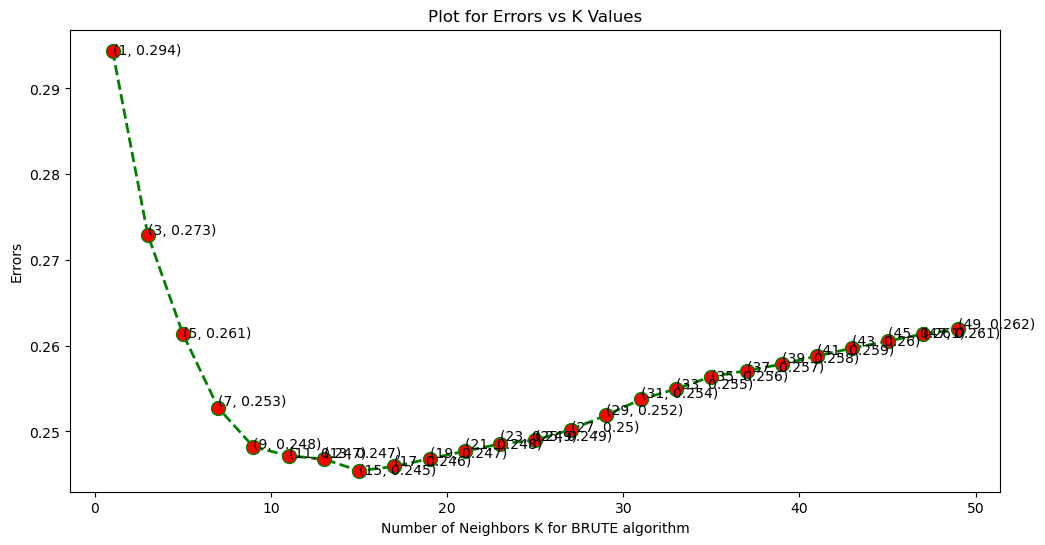

The error for each k value when using BRUTE algorithm: [0.294 0.273 0.261 0.253 0.248 0.247 0.247 0.245 0.246 0.247 0.248 0.249
 0.249 0.25  0.252 0.254 0.255 0.256 0.257 0.258 0.259 0.26  0.261 0.261
 0.262]

''' PERFORMANCE EVALUATION FOR Bag-of-Words model '''


Detailed report for the BRUTE Vectorization using Bag-of-Words algorithm:
The number of accurate predictions out of 10000 data points on unseen data for K = 15 is 7709

Accuracy of the KNN model using BRUTE algorithm on unseen data for K = 15 is 77.09 %
Precision of the KNN model using BRUTE algorithm on unseen data for K = 15 is 0.7414
Recall of the KNN model using BRUTE algorithm on unseen data for K = 15 is 0.2778
F1 score of the KNN model using BRUTE algorithm on unseen data for K = 15 is 0.4042

Classification report for Bag-of-Words model using BRUTE algorithm :

              precision    recall  f1-score   support

           0       0.77      0.96      0.86      7203
           1       0.74      0.28      0.40      

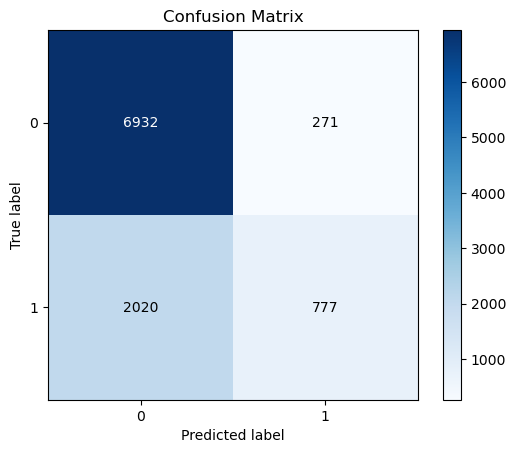

In [16]:
# Assigning the sampled dataset to a new variable
sampled_dataset = final_data

# Split the dataset into train and test sets. Use time-based splitting where the top 80% is for training and the latest 20% for testing.
# Adjust split point accordingly based on dataset size.
split = 40000  # Split point determined based on dataset size or time-based cutoff

# Extracting features (X) and labels (y) from the dataset
X = sampled_dataset['CleanedText']
y = sampled_dataset['Class_Labels']

# Splitting into train and test sets based on the predetermined split point
X_train = X[0:split]  # Training data
y_train = y[0:split]  # Training labels
X_test = X[split:50000]  # Test data
y_test = y[split:50000]  # Test labels

# Initializing the CountVectorizer for Bag-of-Words (BoW) vectorization and fitting it on the training data
cv_object = CountVectorizer().fit(X_train)

# Creating BoW vectors for both train and test datasets using the fitted CountVectorizer
print("\nCreating the Bag-of-Words (BoW) vectors using the cleaned corpus")
X_train_vectors = cv_object.transform(X_train)
X_test_vectors = cv_object.transform(X_test)

# Column standardization of BoW vectors using StandardScaler
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler(with_mean=False)
scalar.fit(X_train_vectors)
X_train_vectors = scalar.transform(X_train_vectors)
X_test_vectors = scalar.transform(X_test_vectors)

# Printing the shapes of the transformed vectors
print("The shape of the X_train_vectors is : {}".format(X_train_vectors.shape))
print("The shape of the X_test_vectors is : {}".format(X_test_vectors.shape))

# Freeing memory allocations by deleting unnecessary variables
del sampled_dataset, X, y, X_train, X_test

# Fitting the KNN algorithm to the BoW model and evaluating its performance
knn_algorithm(X_train_vectors, y_train, X_test_vectors, y_test, "Bag-of-Words")


### KNN on the TF-IDF model created using 'CleanedText' texts

In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

Let's assume we have data corpus D, which contains N reviews {r1,r2,r3,r4...rN}. Let's say our review r1 contains the following words {w1,w2,w3,w1,w9,w6,w7,w9,w9}.

TF or Term Frequency for a word is basically the number of times a word occurs in a review divided by the total number of words present in that same review. For example, in the text corpus that we have considered in the above example, the TF for word w1 is (2/9) and for word w9 is (1/3). Intuitively, higher the occurence of a word in a text is, greater will be its TF value. TF values lies between 0 and 1.

IDF or Inverse Document Frequency for a word is given by the formula log(N/n), where 'N' is equal to the total number of reviews in the corpus 'D' and 'n' refers to the number of reviews in 'D' which contains that specific word. Intuitively, IDF will be higher for words which occur rarely and will be less for words which occurs more frequently. IDF values are more than 0.

So for each word in each review we will consider the product of (TF x IDF), and represent it in a d dimensional vector.

TF-IDF basically doesn't consider the semantic meaning of words. But what is does is that it gives more importance to words which occurs less frequently in the whole data corpus and also gives much importance to the most frequent words that occurs in each review.


Creating the TF-IDF vectors using the cleaned corpus
The shape of the X_train_vectors is : (40000, 5052)
The shape of the X_test_vectors is : (10000, 5052)

Starting Cross Validation steps for TF-IDF model using BRUTE algorithm.

The optimal number of neighbors for BRUTE algorithm is : 17


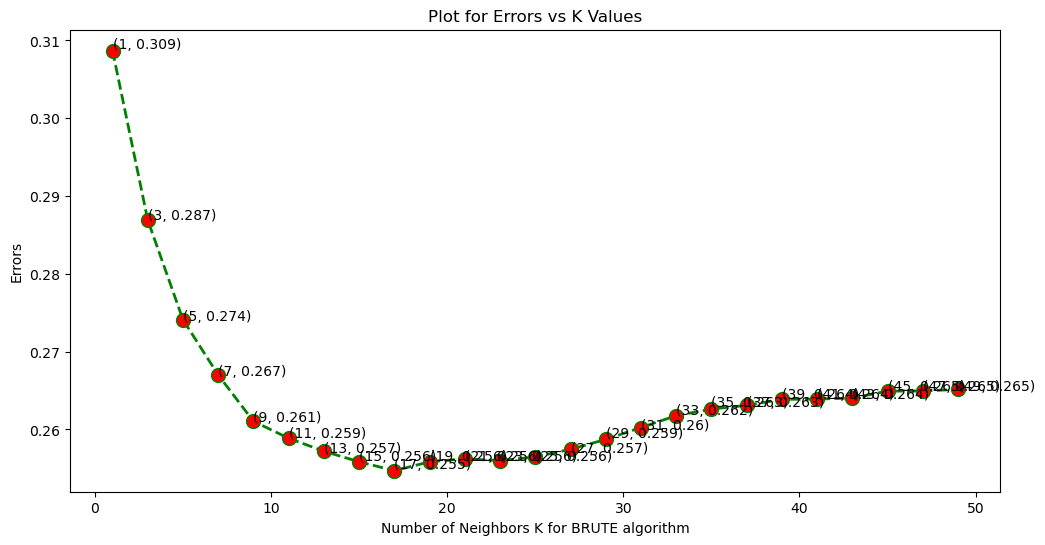

The error for each k value when using BRUTE algorithm: [0.309 0.287 0.274 0.267 0.261 0.259 0.257 0.256 0.255 0.256 0.256 0.256
 0.256 0.257 0.259 0.26  0.262 0.263 0.263 0.264 0.264 0.264 0.265 0.265
 0.265]

''' PERFORMANCE EVALUATION FOR TF-IDF model '''


Detailed report for the BRUTE Vectorization using TF-IDF algorithm:
The number of accurate predictions out of 10000 data points on unseen data for K = 17 is 7600

Accuracy of the KNN model using BRUTE algorithm on unseen data for K = 17 is 76.0 %
Precision of the KNN model using BRUTE algorithm on unseen data for K = 17 is 0.7132
Recall of the KNN model using BRUTE algorithm on unseen data for K = 17 is 0.2374
F1 score of the KNN model using BRUTE algorithm on unseen data for K = 17 is 0.3562

Classification report for TF-IDF model using BRUTE algorithm :

              precision    recall  f1-score   support

           0       0.76      0.96      0.85      7203
           1       0.71      0.24      0.36      2797

    accuracy 

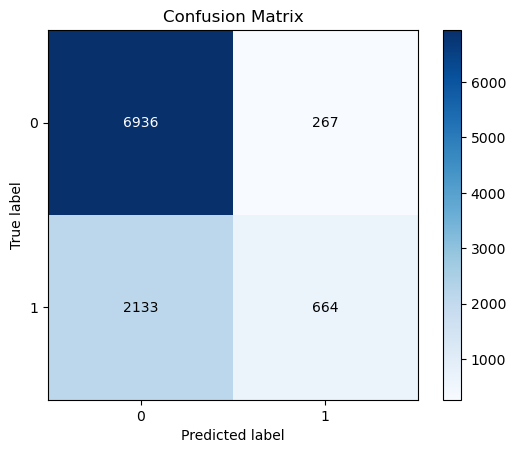

In [19]:
# TF-IDF model creation using text reviews. HTML tags and punctuations are removed. All stopwords are preserved.

# Assigning the sampled dataset to a new variable
sampled_dataset = final_data

# Split the dataset into train and test sets. Use time-based splitting where the top 80% is for training and the latest 20% for testing.
# Adjust split point accordingly based on dataset size.
split = 40000  # Split point determined based on dataset size or time-based cutoff

# Extracting features (X) and labels (y) from the dataset
X = sampled_dataset['CleanedText']
y = sampled_dataset['Class_Labels']

# Splitting into train and test sets based on the predetermined split point
X_train = X[0:split]  # Training data
y_train = y[0:split]  # Training labels
X_test = X[split:50000]  # Test data
y_test = y[split:50000]  # Test labels

# Initializing the TfidfVectorizer for TF-IDF vectorization and fitting it on the training data
tf_idf_object = TfidfVectorizer(ngram_range=(1, 1)).fit(X_train)

# Creating TF-IDF vectors for both train and test datasets using the fitted TfidfVectorizer
print("\nCreating the TF-IDF vectors using the cleaned corpus")
X_train_vectors = tf_idf_object.transform(X_train)
X_test_vectors = tf_idf_object.transform(X_test)

# Column standardization of TF-IDF vectors using StandardScaler (optional, reconsider necessity)
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler(with_mean=False)
scalar.fit(X_train_vectors)
X_train_vectors = scalar.transform(X_train_vectors)
X_test_vectors = scalar.transform(X_test_vectors)

# Printing the shapes of the transformed vectors
print("The shape of the X_train_vectors is : {}".format(X_train_vectors.shape))
print("The shape of the X_test_vectors is : {}".format(X_test_vectors.shape))

# Freeing memory allocations by deleting unnecessary variables
del sampled_dataset, X, y, X_train, X_test

# Fitting the KNN algorithm to the TF-IDF model and evaluating its performance
knn_algorithm(X_train_vectors, y_train, X_test_vectors, y_test, "TF-IDF")


### KNN on the Average Word2Vec using a 100 dimensional vector representation of each word. 

In this model we convert each word present in a review to vectors. For each sentence we will compute the average word to vec representation. Let's look at the below demo example.

Suppose we have N words in a sentence {w1,w2,w3,w4,w5,w6 ... , wN}. We will convert each word to a vector, sum them up and divide by the total number of words (N) present in that particular sentence. So our final vector will look like (1/N) * [word2vec(w1) + word2vec(w2) + word2vec(w3) .... + word2vec(wN)]

In [ ]:
# KNN using the average Word2Vec model on the Amazon dataset, using a 100 dimensional vector representation of each word.

# Assigning the sampled dataset to a new variable
sampled_dataset = final_data

# Split the dataset into train and test sets. Use time-based splitting where the top 80% is for training and the latest 20% for testing.
# Adjust split point accordingly based on dataset size.
split = 40000  # Split point determined based on dataset size or time-based cutoff

# Extracting features (X) and labels (y) from the dataset
X = sampled_dataset['CleanedText']
y = sampled_dataset['Class_Labels']

# Splitting into train and test sets based on the predetermined split point
X_train = X[0:split]  # Training data
y_train = y[0:split]  # Training labels
X_test = X[split:50000]  # Test data
y_test = y[split:50000]  # Test labels

# Function to vectorize using Average Word2Vec
def vectorize(dataset):
    word2vec_corpus = []
    for sentence in dataset:
        word2vec_corpus.append(sentence.split())  # Returns a list of words for each sentence for all the reviews
    print("The size of the Word2Vec text corpus:", len(word2vec_corpus))
    
    # min_count=5 considers only those words for our model which occurs at least 5 times
    word2vec_model = Word2Vec(sentences=word2vec_corpus, size=200, min_count=5, workers=6)
    word2vec_words = list(word2vec_model.wv.vocab)
    print("\nThe number of words that occurred minimum 5 times:", len(word2vec_words))

    # Creating average Word2Vec model by computing the average word2vec for each review.
    sent_vectors = []  # The average word2vec for each sentence/review will be stored in this list
    for sentence in word2vec_corpus:  # For each review
        sent_vec = np.zeros(200)  # 200 dimensional array, where all elements are zero. Used to add word vectors and find averages.
        count_words = 0  # Stores count of words with a valid vector in each review text
        for word in sentence:  # For each word in a given review.
            if word in word2vec_words:
                word_vectors = word2vec_model.wv[word]  # Vector (numpy array of 100 dimensions) for each word.
                sent_vec += word_vectors
                count_words += 1
        if count_words != 0:
            sent_vec /= count_words
        sent_vectors.append(sent_vec)
    print("\nThe length of the sentence vectors:", len(sent_vectors))
    print("\nSize of each vector:", len(sent_vectors[0]))
    sent_vectors = np.array(sent_vectors)
    return sent_vectors

# Vectorizing both train and test datasets using Average Word2Vec
X_train_vectors = vectorize(X_train)
X_test_vectors = vectorize(X_test)

# Column standardization of Average Word2Vec vectors using StandardScaler (optional, reconsider necessity)
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler(with_mean=False)
scalar.fit(X_train_vectors)
X_train_vectors = scalar.transform(X_train_vectors)
X_test_vectors = scalar.transform(X_test_vectors)

# Printing the shapes of the transformed vectors
print("The shape of the X_train_vectors is:", X_train_vectors.shape)
print("The shape of the X_test_vectors is:", X_test_vectors.shape)

# Freeing memory allocations by deleting unnecessary variables
del sampled_dataset, X, y, X_train, X_test

# Fitting the KNN algorithm to the Average Word2Vec model and evaluating its performance
knn_algorithm(X_train_vectors, y_train, X_test_vectors, y_test, "Average-Word2Vec")


### KNN on the TF-IDF weighted Average Word2Vec representation on the reviews 

In this model we convert each word present in a review to vectors. For each sentence we will compute the tf-idf average word to vec representation. Let's look at the below demo example.

Suppose we have N words in a sentence {w1,w2,w3,w4,w5,w6 ... , wN}. We will compute the tf-idf for each word in a review for all reviews. Lets say the corresponding tf-idfs are {t1,t2,t3,t4,t5,t6......tN}. We will convert each word to a vector, sum them up and divide by the summation of tf-idf vectors for all words present in that particular sentence. So our final vector will look like [1/(t1+t2+t3+t4+t5+t6+ ..... +tN)] * [word2vec(w1) + word2vec(w2) + word2vec(w3) .... + word2vec(wN)]

In [ ]:
'''KNN using TF-IDF weighted Average Word2Vec model on the Amazon dataset.'''

# Assigning the sampled dataset to a new variable
sampled_dataset = final_data

# Split the dataset into train and test sets. Use time-based splitting where the top 80% is for training and the latest 20% for testing.
# Adjust split point accordingly based on dataset size.
split = 40000  # Split point determined based on dataset size or time-based cutoff

# Extracting features (X) and labels (y) from the dataset
X = sampled_dataset['CleanedText']
y = sampled_dataset['Class_Labels']

# Splitting into train and test sets based on the predetermined split point
X_train = X[0:split]  # Training data
y_train = y[0:split]  # Training labels
X_test = X[split:50000]  # Test data
y_test = y[split:50000]  # Test labels

# Function to vectorize using TF-IDF weighted Average Word2Vec
def vectorize(dataset, fit_dataset):

    # word2vec_corpus will store the list of words for each review.
    word2vec_corpus = []
    for sentence in dataset:
        word2vec_corpus.append(sentence.split())

    # min_count=5 considers only those words which occur at least 5 times
    word2vec_model = Word2Vec(sentences=word2vec_corpus, size=200, min_count=5, workers=6)
    word2vec_words = list(word2vec_model.wv.vocab)

    # Initializing the TF-IDF constructor with review texts. HTML tags and punctuations are removed. Stopwords are preserved.
    tf_idf_object = TfidfVectorizer(ngram_range=(1, 1)).fit(fit_dataset)
    final_tf_idf_vectors = tf_idf_object.transform(dataset)
    tfidf_features = tf_idf_object.get_feature_names()

    # Algorithm for finding the TF-IDF weighted average word2vec vectors.
    tfidf_sent_vectors = []  # The tfidf-w2v for each sentence/review will be stored in this list
    row = 0
    for sentence in word2vec_corpus:  # For each review/sentence
        sent_vec = np.zeros(200)  # 200 dimensional array, where all elements are zero. Used to add word vectors and find averages at each iteration.
        weight_sum = 0  # This will store the count of the words with a valid vector in each review text.
        for word in sentence:  # For each word in a review/sentence
            if (word in word2vec_words) and (word in tfidf_features):
                word_vectors = word2vec_model.wv[word]
                tf_idf = final_tf_idf_vectors[row, tfidf_features.index(word)]  # tf_idf of a word in a sentence/review
                sent_vec += (word_vectors * tf_idf)
                weight_sum += tf_idf
        if weight_sum != 0:
            sent_vec /= weight_sum
        tfidf_sent_vectors.append(sent_vec)
        row += 1

    tfidf_sent_vectors = np.array(tfidf_sent_vectors)
    return tfidf_sent_vectors

# Vectorizing both train and test datasets using TF-IDF weighted Average Word2Vec
X_train_vectors = vectorize(X_train, X_train)
X_test_vectors = vectorize(X_test, X_train)

# Column standardization of TF-IDF Average Word2Vec vectors using StandardScaler
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler(with_mean=False)
scalar.fit(X_train_vectors)
X_train_vectors = scalar.transform(X_train_vectors)
X_test_vectors = scalar.transform(X_test_vectors)

# Printing the shapes of the transformed vectors
print("The shape of the X_train_vectors is:", X_train_vectors.shape)
print("The shape of the X_test_vectors is:", X_test_vectors.shape)

# Freeing memory allocations by deleting unnecessary variables
del X, y, X_train, X_test, sampled_dataset

# Fitting the KNN algorithm to the TF-IDF Average Word2Vec model and evaluating its performance
knn_algorithm(X_train_vectors, y_train, X_test_vectors, y_test, "TF-IDF-Average-Word2Vec")


In [ ]:
# pip install prettytable


In [21]:
from prettytable import PrettyTable

# Initialize a PrettyTable instance
table = PrettyTable()

# Define the column names for the table
table.field_names = ["Model", "Hyper-Parameter Value (K=)", "Train Error", "Test Error", "F1-Score"]

# Open the file containing model information
with open('info_model_KNN.txt', 'r') as file:
    # Read each line from the file
    for line in file:
        # Split the line into individual elements (assuming they are space-separated)
        row = line.split()
        # Add the row to the PrettyTable
        table.add_row(row)

# Print the table
print("Please find below the important metrics for all the models:\n")
print(table)


Please find below the important metrics for all the models:

+--------------+----------------------------+-------------+------------+----------+
|    Model     | Hyper-Parameter Value (K=) | Train Error | Test Error | F1-Score |
+--------------+----------------------------+-------------+------------+----------+
| Bag-of-Words |             15             |    0.2557   |   0.2291   |  0.4042  |
|    TF-IDF    |             17             |    0.264    |    0.24    |  0.3562  |
| Bag-of-Words |             15             |    0.2557   |   0.2291   |  0.4042  |
|    TF-IDF    |             17             |    0.264    |    0.24    |  0.3562  |
| Bag-of-Words |             15             |    0.2557   |   0.2291   |  0.4042  |
|    TF-IDF    |             17             |    0.264    |    0.24    |  0.3562  |
| Bag-of-Words |             15             |    0.2557   |   0.2291   |  0.4042  |
| Bag-of-Words |             15             |    0.2557   |   0.2291   |  0.4042  |
|    TF-IDF    